In [7]:
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
print(tf.version)
from tensorflow import keras

# import sklearn
import matplotlib.pyplot as plt



<module 'tensorflow_core._api.v2.version' from '/tensorflow-2.1.0/python3.6/tensorflow_core/_api/v2/version/__init__.py'>


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output #just to clear the output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

In [9]:
 fashion_mnist = keras.datasets.fashion_mnist # load dataset

 (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into training and testing


4423680/4422102 [==============================] - 0s 0us/step


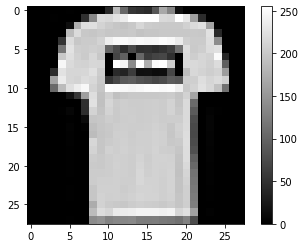

In [24]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
# plt.gray()
plt.grid(False)
plt.show()

## Data Preprocessing

Simply scale all of the greyscale pixel values (0-255) to be between 0 and 1. \
We do this because smaller values will make it easier for the model to process our values.

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Building the Model

Feed-forward neural network (one that passes values from left to right).

In [0]:
model = keras.Sequential([ ## Sequential basically means flow of information from left to right. 
                          keras.layers.Flatten(input_shape=(28,28)), ## Flatten -> converts 28 x 28 matrix to 784 elements array.
                          keras.layers.Dense(64, activation= 'relu'), ## Dense -> every neuron in the input layer is connected to every neuron in this hidden layer.
                          keras.layers.Dense(10, activation= 'softmax') ## 10 because no. of classes are ten.
])

## Compile the model
# hyper-parameters
model.compile(optimizer='adam', ## performs gradient descent
              loss = 'sparse_categorical_crossentropy', ## because there are multiple (more than 2) classes.
              metrics = ['accuracy'])

## Training


In [34]:
model.fit(train_images, train_labels, epochs=7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2550 - accuracy: 0.9047
Epoch 2/7
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2485 - accuracy: 0.9069
Epoch 3/7
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2406 - accuracy: 0.9096
Epoch 4/7
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2373 - accuracy: 0.9115
Epoch 5/7
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2301 - accuracy: 0.9151
Epoch 6/7
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2251 - accuracy: 0.9162
Epoch 7/7
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2219 - accuracy: 0.9161


## Evaluation

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1) ## verbose -> how are printing out to the console 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3557 - accuracy: 0.8812
Test accuracy: 0.8812


## Prediction

Pullover


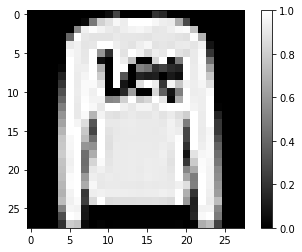

In [37]:
predictions = model.predict(test_images)

print(class_name[np.argmax(predictions[1])])

plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.show()

Pick a number: 5


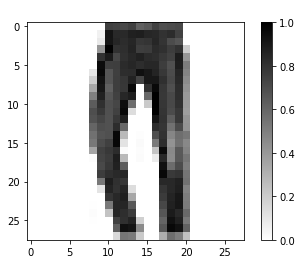

In [40]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_name[np.argmax(prediction)]

  show_image(image,class_name[correct_label], predicted_class)

def show_image(img,label, guess):
  plt.figure()
  plt.imshow(img,cmap=plt.cm.binary)
  plt.title("Expected: "+ label)
  plt.xlabel("Guess: "+ guess)
  plt.colorbar()
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)

      else:
        print('Try again...')


num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

